## HW1: Logistic regression and Linear Regression using Gradient Descent
In hw1, you need to implement linear regression by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get no points by simply calling sklearn.linear_model.LinearRegression

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import random

: 

# Part 1. Linear regression model

## Load regression data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

: 

In [297]:
x_train, x_test, y_train, y_test = np.load('/content/drive/MyDrive/ML/HW1/regression_data.npy', allow_pickle=True)

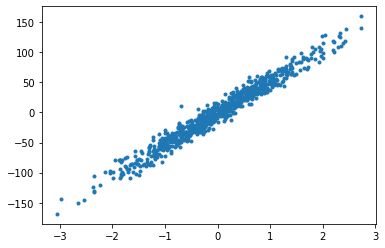

In [298]:
plt.plot(x_train, y_train, '.')

## Train your model 
### Pseudo code:
1. Random initialize the weights, intercepts of the linear model

**for i in range(iteration)**

    2. Feed foward the training data into the model, get the output prediction
    3. Calculating training loss by Mean Square Error of predcition and ground truth data
    4. Calculating the gradients
    5. Updating the weights and intercepts by the gradients * learning rate 
    
**End of training**

## Test the performance on the testing data
Inference the test data (x_test) by your model and calculate the loss of (y_test, y_pred)

In [299]:
def your_model(data, m, c):
  pred = np.array([]) 
  for x in data: 
    cur = m * x + c
    pred = np.append(pred, cur)
  return pred

def Mean_square_error(ground_truth, pred):
  n = len(ground_truth)
  sum = 0
  for i in range(n):
    diff = pred[i] - ground_truth[i]  #finding the difference
    squared = diff**2  # taking square of diff
    sum = sum + squared
  MSE = sum / n / 2
  return MSE

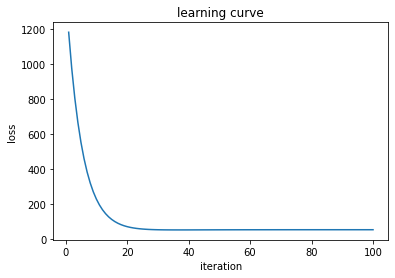

In [300]:
epochs = 100
learning_rate = 0.05

m = random.uniform(0, 1)
c = random.uniform(0, 1)

n = len(x_train) # Number of elements in x_train
# print(n)
# print(x_train.shape)
# print(y_train.shape)

it = np.array([])
E = np.array([])

# Performing Gradient Descent
for i in range(epochs):
  D_m = 0
  D_c = 0
  for j in range(len(x_train)):
    cur_pred = m * x_train[j][0] + c  # The current predicted y
    D_m += (-2/n) * (x_train[j][0] * (y_train[j] - cur_pred))  # Derivative m
    D_c += (-2/n) * (y_train[j] - cur_pred) # Derivative c
  m -= learning_rate * D_m  # Update m
  c -= learning_rate * D_c  # Update c

  y_pred = your_model(x_test, m, c)
  error = Mean_square_error(y_test, y_pred)

  it = np.append(it, i + 1)
  E = np.append(E, error)

plt.title("learning curve") # 標題
plt.xlabel("iteration") # x軸的名稱
plt.ylabel("loss") # y軸的名稱
plt.plot(it, E)
plt.show()

In [301]:
y_pred = your_model(x_test, m, c)
print("Mean Square Error: ", Mean_square_error(y_test, y_pred))
print("weights: ", m)
print("intercept: ", c)

Mean Square Error:  55.21442393346432
weights:  52.740506078296974
intercept:  -0.3341827098529554


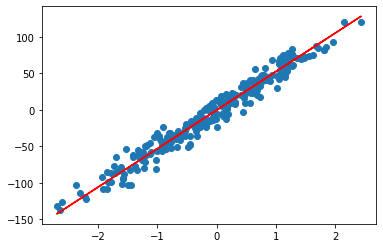

In [302]:
plt.scatter(x_test, y_test) 
plt.plot(x_test, y_pred, color='red')  # regression line
plt.show()

# Part 2. Logistic regression model

## Load classification data

In [303]:
import math

In [304]:
x_train, x_test, y_train, y_test = np.load('/content/drive/MyDrive/ML/HW1/classification_data.npy', allow_pickle=True)

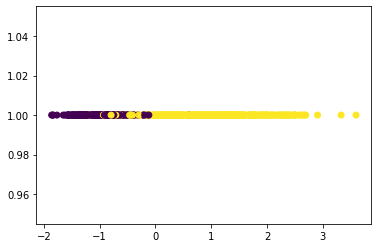

In [305]:
plt.scatter(x_train, np.ones_like(x_train), c=y_train)

In [306]:
def your_model2(data, w, b):
    pred = np.array([])
    n = len(data) 
    for i in range(n):
      temp = data[i][0] * w[i] + b[i]
      pred = np.append(pred, sigmoid(temp))
      # pred = np.append(pred, 1 / (1 + math.exp(-temp)))
    return pred

def sigmoid(t):
  return 1 / (1 + math.exp(-t))

def cross_entropy(label, pred):
  error = 0
  n = len(label)
  for i in range(n):
    error -= label[i] * math.log(pred[i]) + (1 - label[i]) * math.log(1 - pred[i])
  return error

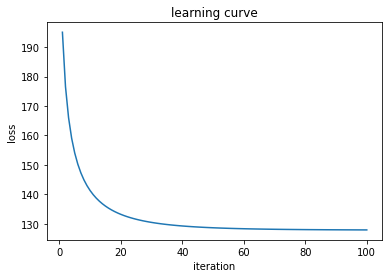

In [307]:
epochs = 100
learning_rate = 0.005

n = len(x_train) # Number of elements in x_train
weights = np.ndarray(n)
weights.fill(np.random.normal())
b = np.ndarray(n)
b.fill(np.random.normal())

it = np.array([])
E = np.array([])

for i in range(epochs):
  D_w = 0
  D_b = 0
  # y_pred = your_model2(x_train, weights, b)
  for j in range(n):
    a = x_train[j][0] * weights[j] + b[j]
    h = sigmoid(a) # The current predicted y
    D_w += x_train[j][0] * (h - y_train[j]) # Derivative w
    D_b += h - y_train[j] # Derivative b
  weights -= learning_rate * D_w # Update w
  b -= learning_rate * D_b # Update b

  y_pred = your_model2(x_train, weights, b)
  error = cross_entropy(y_train, y_pred)

  it = np.append(it, i + 1)
  E = np.append(E, error)

plt.title("learning curve") # 標題
plt.xlabel("iteration") # x軸的名稱
plt.ylabel("loss") # y軸的名稱
plt.plot(it, E)
plt.show()

In [308]:
y_pred = your_model2(x_test, weights, b)
print("Cross Entropy Error: ", cross_entropy(y_test, y_pred))
print("weights: ", weights[0])
print("intercept: ", b[0])

Cross Entropy Error:  46.76386924375035
weights:  4.731254123252488
intercept:  1.6229425277741278


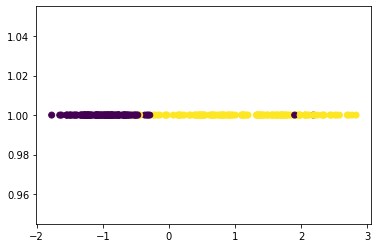

In [309]:
plt.scatter(x_test, np.ones_like(x_test), c=y_test)
plt.show()